# Martingale Betting

**Introduction**

Given an infinite amount of money and attempts at a game of odds, the martingale system should generate profit.

What is the martingale system? It is a betting strategy where each sucessful bet will make up for any past losses. If we double our bet everytime we lose, we should eventually recoup any losses. 

Let's explore this strategy through betting on a coin toss. If we initially bet \\$1 on a coin toss and win, we would profit \\$1. If we lose, then our total losses at this point would be \\$1. To make up for this loss, we would bet \\$2 on the next hand. If we win this bet, our total winnings would be \\$4 so our net gain would be \\$1.

Now let's extend this to the most similar thing to a coin toss in a casino, roulette.

**Basics of Roulette**

There are two major types of roulette, European and American. In both versions, one can bet on a specific number or bet on a category (evens/odds, color). It is more likely to win when betting within a specific category, but the payoffs are much smaller than betting on an individual number.In European Roulette there are 37 slots on the roulette wheel, numbered from 0 to 36, with 18 colored red and 18 colored black. The remaining slot (0) is colored green and not considered even or odd. With American roulette, the same holds true except there is an additional slot, 00. This slot, like 0, is colored green and not considered even or odd.

To test this, let's first create an engine for Roulette. To keep our model simple, we will only bet on the even/odd categories.

In [3]:
import random
import matplotlib.pyplot as plt
import numpy as np

EURO = 37
AMERICAN = 38

EVEN = 0
ODD = 1

def spin(num_spaces):
    result = random.randint(0, num_spaces)
    return result

def is_bet_success(result, call):
    # Represents 0 or 00 being spun
    if result == 0 or result == 37:
        return False
    else:
        return result % 2 == call

**Coding our strategy**

Now let's code up our betting strategy:

Martingale Betting System
    
Input: 
* start amount : starting amount of money we have
* num_hands : max number of hands we should play
* call : our call for roulette (EVEN or ODD)
    
Output: 
* (number of hands played, final dollar amount)

In [4]:
def martingale(start_amount, num_hands, call, initial_bet=1,roulette_type=EURO):    
    amount = start_amount
    outcome = True
    bet_amount = 0
    
    # Keeps track of iteration number and total amount, useful for graphing later
    states = []
    
    # Loop until bankrupt or 
    for iteration in range(num_hands):
        # If we go bankrupt, exit game
        if amount <= bet_amount:
            return states
        
        # Place bet and update our amounts
        bet_amount = initial_bet if outcome else (2 * bet_amount)
        spin_result = spin(roulette_type)
        outcome = is_bet_success(spin_result, call)
        amount = (amount + bet_amount) if outcome else (amount - bet_amount)
        
        curr_state = iteration, amount
        states.append(curr_state)
        
    return states

**Plotting Amount vs Hand Played**

Using the above strategy, let's plot what our amount is at the end of each hand. Looking at the graph we can see that although there are some sudden drops, most of the time it will recover. We can also see that over time the amount trends upward. This trend is because everytime we win a hand, we will have more than our previous max amount. As long as we don't burn through all our money, we will continually increase the amount in our wallet.

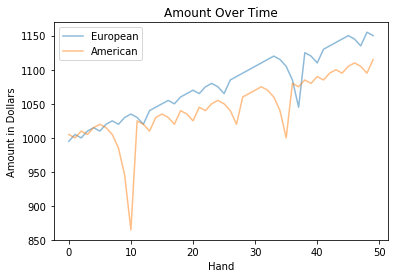

In [12]:
# Generate datapoints for European Roulette
bet_history_euro = martingale(1000, 50, EVEN, initial_bet=5, roulette_type=EURO)
earnings_over_time_euro = [amount for (hand, amount) in bet_history_euro]

# Generate datapoints for American Roulette
bet_history_american = martingale(1000, 50, EVEN, initial_bet=5, roulette_type=AMERICAN)
earnings_over_time_american = [amount for (hand, amount) in bet_history_american]

# Plot American vs European earnings history
plt.plot(earnings_over_time_euro, alpha=0.5, label='European')
plt.plot(earnings_over_time_american, alpha=0.5, label='American')
plt.legend()
plt.title('Amount Over Time')
plt.xlabel('Hand')
plt.ylabel('Amount in Dollars')
plt.show()

**Plotting Our Final Amounts**

Let's plot our final amounts:

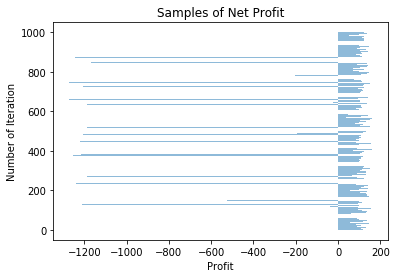

Percentage net positive:  0.857


In [33]:
final_earnings = []
starting_amount = 1000

# Collect 1000 samples
for i in range(1000):
    bet_history = martingale(starting_amount, 50, EVEN, initial_bet=5)
    final_amount = bet_history[-1][-1]  # Gets amount from last entry
    final_earnings.append(final_amount - starting_amount) # Subtract 1000 to get the profit

# Plot Samples as bar graph
y_pos = np.arange(len(final_earnings))
plt.barh(y_pos, final_earnings, alpha=0.5, align='center')
plt.title('Samples of Net Profit')
plt.xlabel('Profit')
plt.ylabel('Number of Iteration')
plt.show()

num_pos = [1 for x in final_earnings if x > 0]
print('Percentage net positive: ', sum(num_pos)/len(final_earnings))